In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
import folium
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [23]:
X_train=pd.read_csv('/Users/zuza/Desktop/X_train.csv', index_col=0)

In [24]:
X_train.head()

,time,seconds_elapsed_orientation,qz_orientation,qy_orientation,qx_orientation,qw_orientation,roll_orientation,pitch_orientation,yaw_orientation,seconds_elapsed_location,...,horizontalAccuracy_location_network,speed_location_network,bearing_location_network,altitude_location_network,longitude_location_network,latitude_location_network,seconds_elapsed_gravity,z_gravity,y_gravity,x_gravity
1532440,1694856436817851600,127.575852,-0.659162,0.252138,-0.704714,0.072871,-1.704910,0.450156,-2.849463,127.072000,...,122.400002,0.0,0.0,15.700000,3.100094,50.682566,127.575852,-1.180672,-4.266960,8.750398
1241906,1694850695837889000,508.709889,0.380207,-0.870947,0.300362,0.081716,-2.653062,0.660095,-0.834548,508.191000,...,800.000000,0.0,0.0,0.000000,3.123176,50.672179,508.709889,-6.836542,-6.013351,3.643037
57903,1694672680729749800,129.277750,0.528210,-0.454058,-0.605905,0.384324,2.037298,1.238830,2.683162,128.796625,...,34.575001,0.0,0.0,89.000000,3.139532,50.685145,129.277750,-1.437885,-9.271173,-2.854510
2279316,1694888562008397000,481.953397,0.162305,-0.127510,-0.579647,0.788294,-0.043528,1.270524,-0.374022,481.764502,...,35.208000,0.0,0.0,88.900002,3.148445,50.684358,481.953397,2.910758,-9.364353,0.082350
520841,1694680852518048500,187.191049,0.305719,-0.296312,0.892543,0.148668,-2.452161,-0.084309,-2.470231,186.989000,...,14.507000,0.0,0.0,68.599998,3.095495,50.688239,187.191049,-7.539892,0.825681,6.216005


In [25]:
X_train.columns

Index(['time', 'seconds_elapsed_orientation', 'qz_orientation',
       'qy_orientation', 'qx_orientation', 'qw_orientation',
       'roll_orientation', 'pitch_orientation', 'yaw_orientation',
       'seconds_elapsed_location', 'bearingAccuracy_location',
       'speedAccuracy_location', 'verticalAccuracy_location',
       'horizontalAccuracy_location', 'speed_location', 'bearing_location',
       'altitude_location', 'longitude_location', 'latitude_location',
       'seconds_elapsed_total_acceleration', 'z_total_acceleration',
       'y_total_acceleration', 'x_total_acceleration',
       'seconds_elapsed_magnetometer', 'z_magnetometer', 'y_magnetometer',
       'x_magnetometer', 'seconds_elapsed_accelerometer', 'z_accelerometer',
       'y_accelerometer', 'x_accelerometer', 'seconds_elapsed_location_gps',
       'bearingAccuracy_location_gps', 'speedAccuracy_location_gps',
       'verticalAccuracy_location_gps', 'horizontalAccuracy_location_gps',
       'speed_location_gps', 'bearing_l

# Data interpretation
### Time
- **time**: Time when the data was collected.

### Orientation
- **seconds_elapsed_orientation**: Time elapsed since the orientation measurement started.
- **qz_orientation, qy_orientation, qx_orientation, qw_orientation**: Components of the quaternion representing the device's orientation in 3D space.
- **roll_orientation, pitch_orientation, yaw_orientation**: Angles representing the roll, pitch, and yaw of the device.

### Location
- **seconds_elapsed_location**: Time elapsed since the location measurement started.
- **bearingAccuracy_location**: Accuracy of bearing measurement.
- **speedAccuracy_location**: Accuracy of speed measurement.
- **verticalAccuracy_location, horizontalAccuracy_location**: Accuracy of vertical and horizontal location measurement.
- **speed_location**: Speed of the device's movement.
- **bearing_location**: Direction of device movement.
- **altitude_location**: Altitude above sea level.
- **longitude_location, latitude_location**: Geographic coordinates.

### Total Acceleration
- **seconds_elapsed_total_acceleration**: Duration of total acceleration measurement.
- **z_total_acceleration, y_total_acceleration, x_total_acceleration**: Components of the total acceleration in the XYZ axes.

### Magnetometer
- **seconds_elapsed_magnetometer**: Duration of magnetometer measurement.
- **z_magnetometer, y_magnetometer, x_magnetometer**: Components of the magnetic field in the XYZ axes.

### Gyroscope
- **seconds_elapsed_gyroscope**: Duration of gyroscope measurement.
- **z_gyroscope, y_gyroscope, x_gyroscope**: Components of angular velocity in the XYZ axes.

### Pedometer
- **seconds_elapsed_pedometer**: Duration of pedometer measurement.
- **steps_pedometer**: Number of steps taken by the user.

### GPS Location
- **seconds_elapsed_location_gps**: Duration of GPS location measurement.
- **bearingAccuracy_location_gps, speedAccuracy_location_gps, verticalAccuracy_location_gps, horizontalAccuracy_location_gps**: Accuracy parameters of GPS location measurement.
- **speed_location_gps, bearing_location_gps, altitude_location_gps, longitude_location_gps, latitude_location_gps**: GPS location parameters.

### Network Location
- **seconds_elapsed_location_network**: Duration of network location measurement.
- **bearingAccuracy_location_network, speedAccuracy_location_network, verticalAccuracy_location_network, horizontalAccuracy_location_network**: Accuracy parameters of network location measurement.
- **speed_location_network, bearing_location_network, altitude_location_network, longitude_location_network, latitude_location_network**: Network location parameters.

### Gravity
- **seconds_elapsed_gravity**: Duration of gravity measurement.
- **z_gravity, y_gravity, x_gravity**: Components of the gravitational vector in the XYZ axes.


## Stats and distributions

In [28]:
summary_stats = X_train.describe(include='all')
summary_stats

,time,seconds_elapsed_orientation,qz_orientation,qy_orientation,qx_orientation,qw_orientation,roll_orientation,pitch_orientation,yaw_orientation,seconds_elapsed_location,...,horizontalAccuracy_location_network,speed_location_network,bearing_location_network,altitude_location_network,longitude_location_network,latitude_location_network,seconds_elapsed_gravity,z_gravity,y_gravity,x_gravity
count,2.205096e+06,2.205096e+06,2.205096e+06,2.205096e+06,2.205096e+06,2.205096e+06,2.205096e+06,2.205096e+06,2.205096e+06,2.205096e+06,...,2.205096e+06,2205096.0,2205096.0,2.205096e+06,2.205096e+06,2.205096e+06,2.205096e+06,2.205096e+06,2.205096e+06,2.205096e+06
mean,1.695278e+18,4.123492e+02,8.289532e-02,-2.504169e-01,-1.180989e-01,3.175268e-01,-1.726925e+00,6.281132e-01,-4.842978e-01,4.129218e+02,...,1.996314e+02,0.0,0.0,6.217686e+01,3.117947e+00,5.068322e+01,4.123492e+02,-4.099751e+00,-5.018346e+00,4.090418e+00
std,1.065209e+15,3.295429e+02,3.690645e-01,5.011971e-01,6.172802e-01,2.172728e-01,1.603991e+00,5.146918e-01,1.757829e+00,3.294353e+02,...,3.059238e+02,0.0,0.0,3.117885e+01,2.024171e-02,5.086446e-03,3.295429e+02,3.183771e+00,3.784780e+00,3.603636e+00
min,1.694673e+18,7.583887e-02,-9.992675e-01,-9.985679e-01,-9.986104e-01,2.653055e-07,-3.141592e+00,-1.290022e+00,-3.141563e+00,1.350000e-01,...,1.150500e+01,0.0,0.0,0.000000e+00,3.091028e+00,5.067218e+01,7.583887e-02,-9.806552e+00,-9.806651e+00,-7.138989e+00
25%,1.694683e+18,1.520307e+02,-2.398439e-01,-6.573621e-01,-6.545082e-01,1.454286e-01,-2.715969e+00,1.690385e-01,-2.311771e+00,1.528610e+02,...,1.702100e+01,0.0,0.0,6.650000e+01,3.097713e+00,5.068115e+01,1.520307e+02,-7.518279e+00,-8.771683e+00,8.114333e-01
50%,1.694857e+18,3.182013e+02,2.096691e-01,-3.316783e-01,-3.660454e-01,2.851972e-01,-2.437859e+00,5.867223e-01,-5.746036e-01,3.184418e+02,...,4.367800e+01,0.0,0.0,6.860000e+01,3.118797e+00,5.068412e+01,3.182013e+02,-3.701089e+00,-5.423852e+00,3.684282e+00
75%,1.694889e+18,6.008763e+02,3.306551e-01,-6.530027e-03,4.366283e-01,5.029687e-01,-1.743542e+00,1.107627e+00,9.433791e-01,6.016991e+02,...,1.496000e+02,0.0,0.0,8.560000e+01,3.137739e+00,5.068806e+01,6.008763e+02,-1.820986e+00,-1.643082e+00,7.796961e+00
max,1.697621e+18,1.311321e+03,9.992433e-01,9.991525e-01,9.983392e-01,9.919081e-01,3.141590e+00,1.570451e+00,3.141579e+00,1.310868e+03,...,1.899999e+03,0.0,0.0,9.670000e+01,3.152565e+00,5.069258e+01,1.311321e+03,9.805528e+00,9.408863e+00,9.800911e+00


In [29]:
selected_columns = ['qz_orientation', 'z_total_acceleration', 'z_gravity', 'z_magnetometer', 'z_accelerometer', 'z_gyroscope']
summary_table = summary_stats.loc[:, selected_columns]
print(summary_table)

       qz_orientation  z_total_acceleration     z_gravity  z_magnetometer  \
count    2.205096e+06          2.205096e+06  2.205096e+06    2.205096e+06   
mean     8.289532e-02         -4.012810e+00 -4.099751e+00    1.818235e+01   
std      3.690645e-01          3.639003e+00  3.183771e+00    1.552702e+01   
min     -9.992675e-01         -5.512305e+01 -9.806552e+00   -5.375625e+01   
25%     -2.398439e-01         -7.452000e+00 -7.518279e+00    7.950000e+00   
50%      2.096691e-01         -3.670950e+00 -3.701089e+00    2.317500e+01   
75%      3.306551e-01         -1.639950e+00 -1.820986e+00    2.880000e+01   
max      9.992433e-01          3.909900e+01  9.805528e+00    1.619438e+02   

       z_accelerometer   z_gyroscope  
count     2.205096e+06  2.205096e+06  
mean      8.694947e-02 -1.272786e-02  
std       2.463891e+00  7.281408e-01  
min      -5.080528e+01 -9.956787e+00  
25%      -5.180488e-01 -3.434750e-01  
50%       5.989790e-02 -8.250000e-04  
75%       5.561355e-01  2.547875e

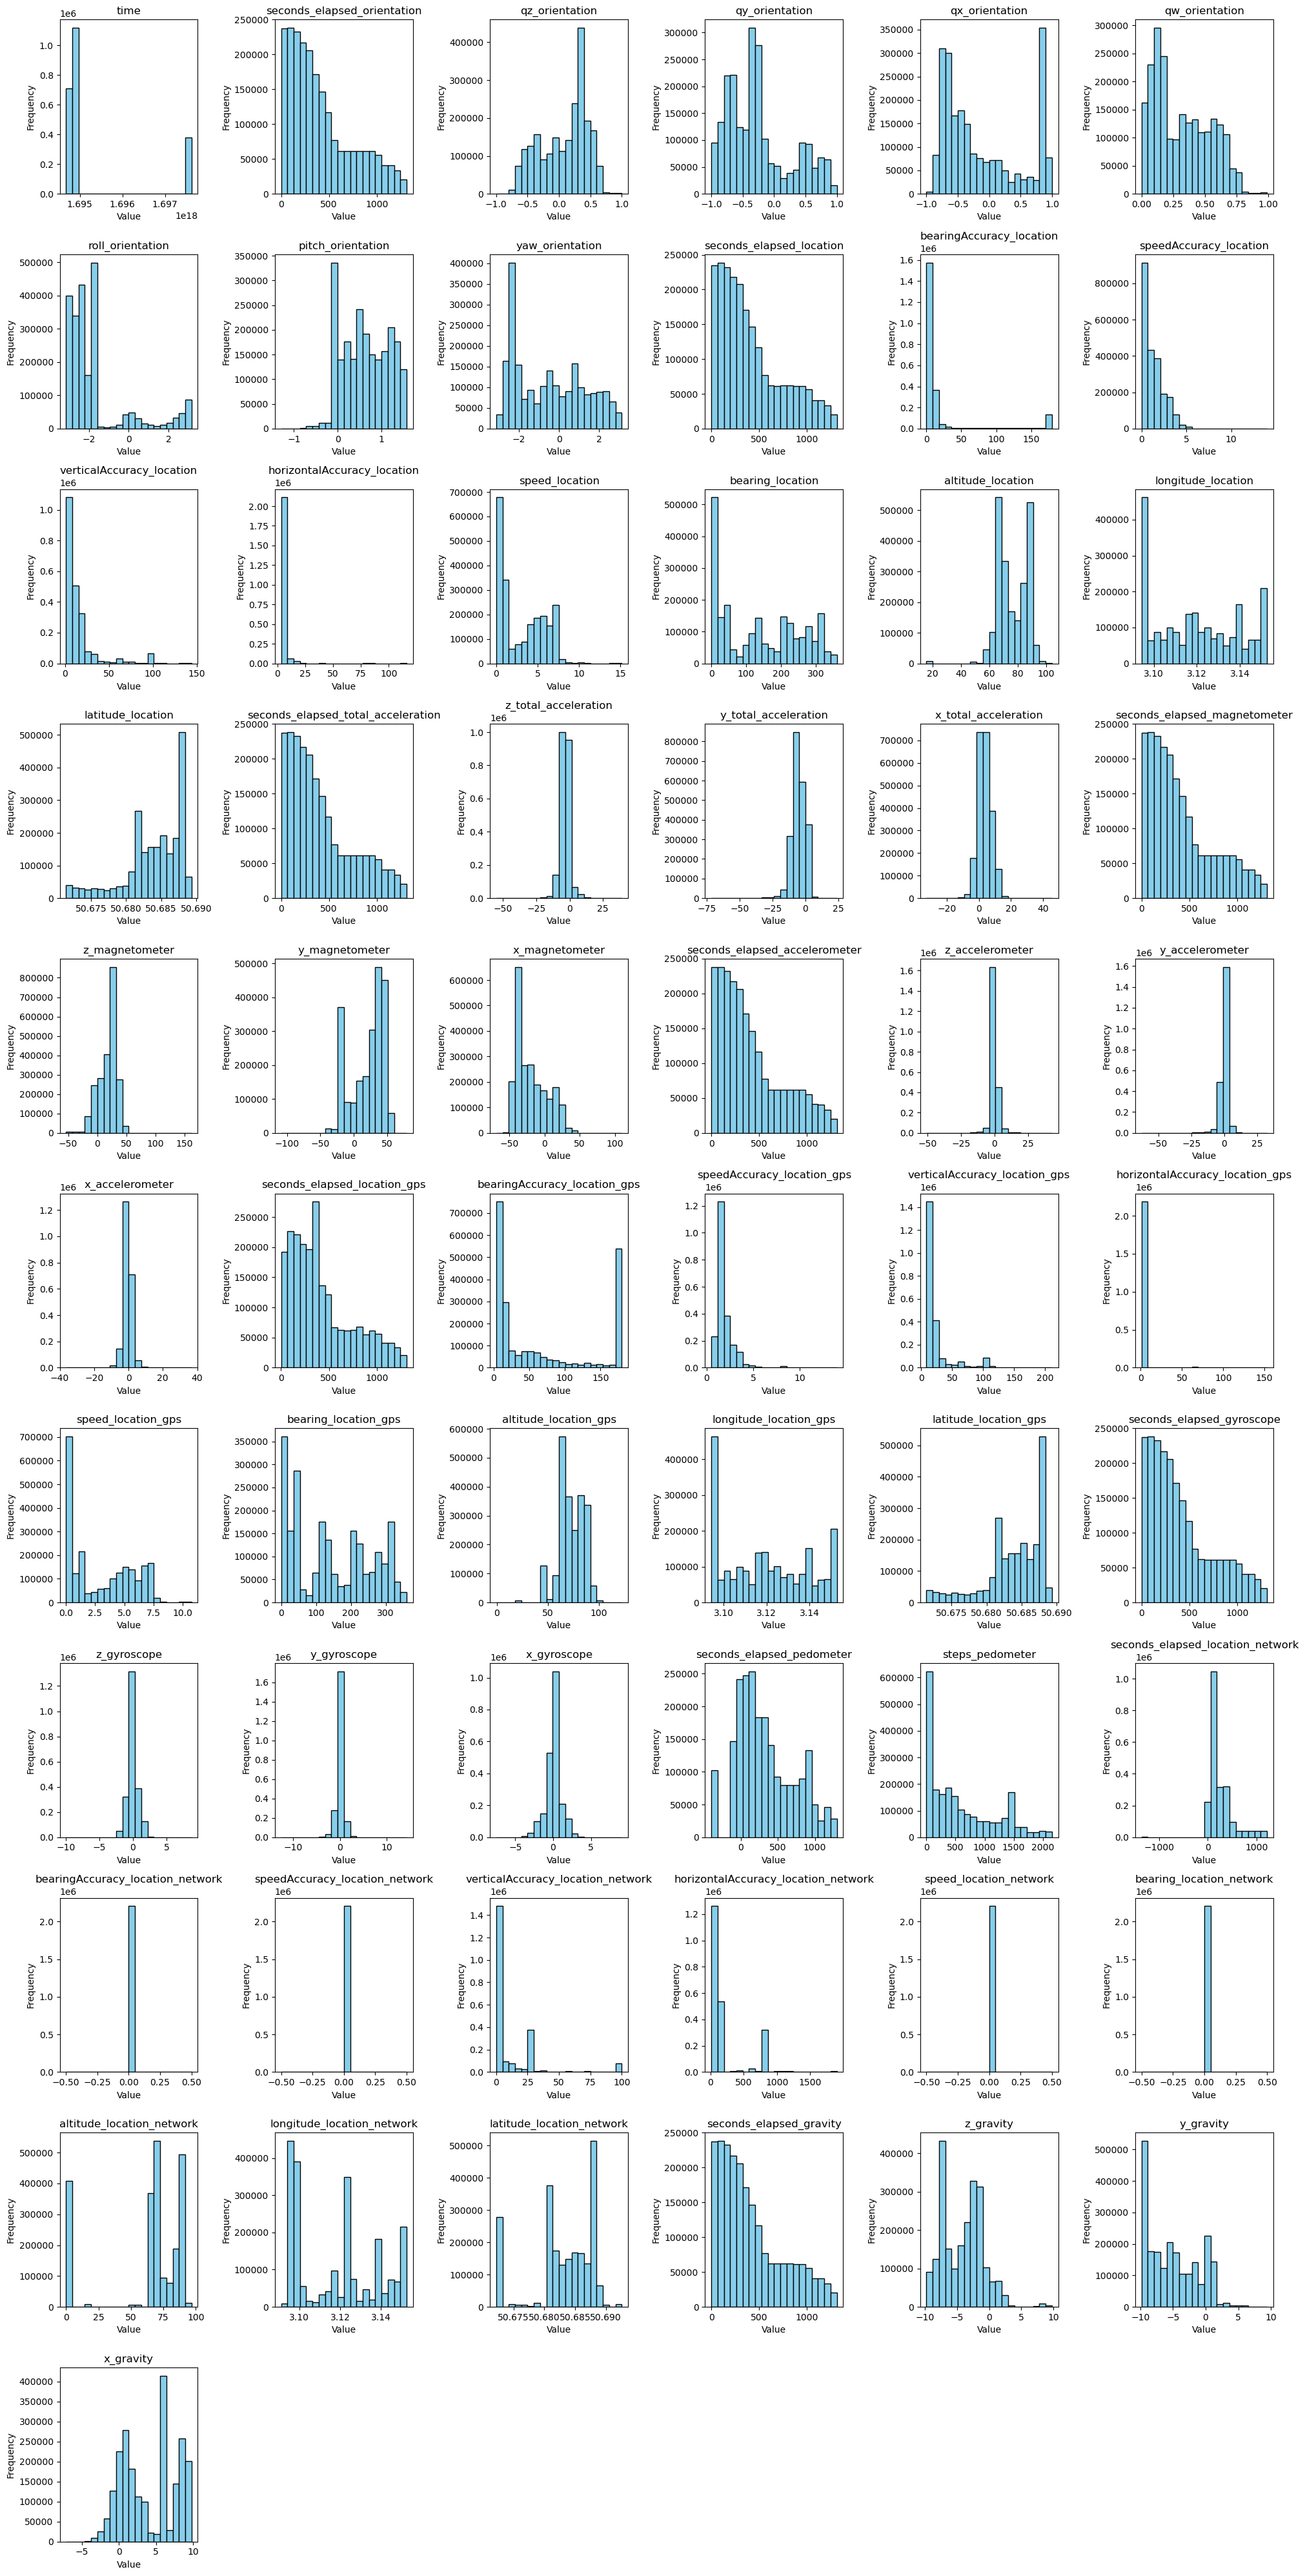

In [30]:
plt.figure(figsize=(20, 40))

for i, column in enumerate(X_train.columns, 1):
    plt.subplot(11, 6, i)
    plt.hist(X_train[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

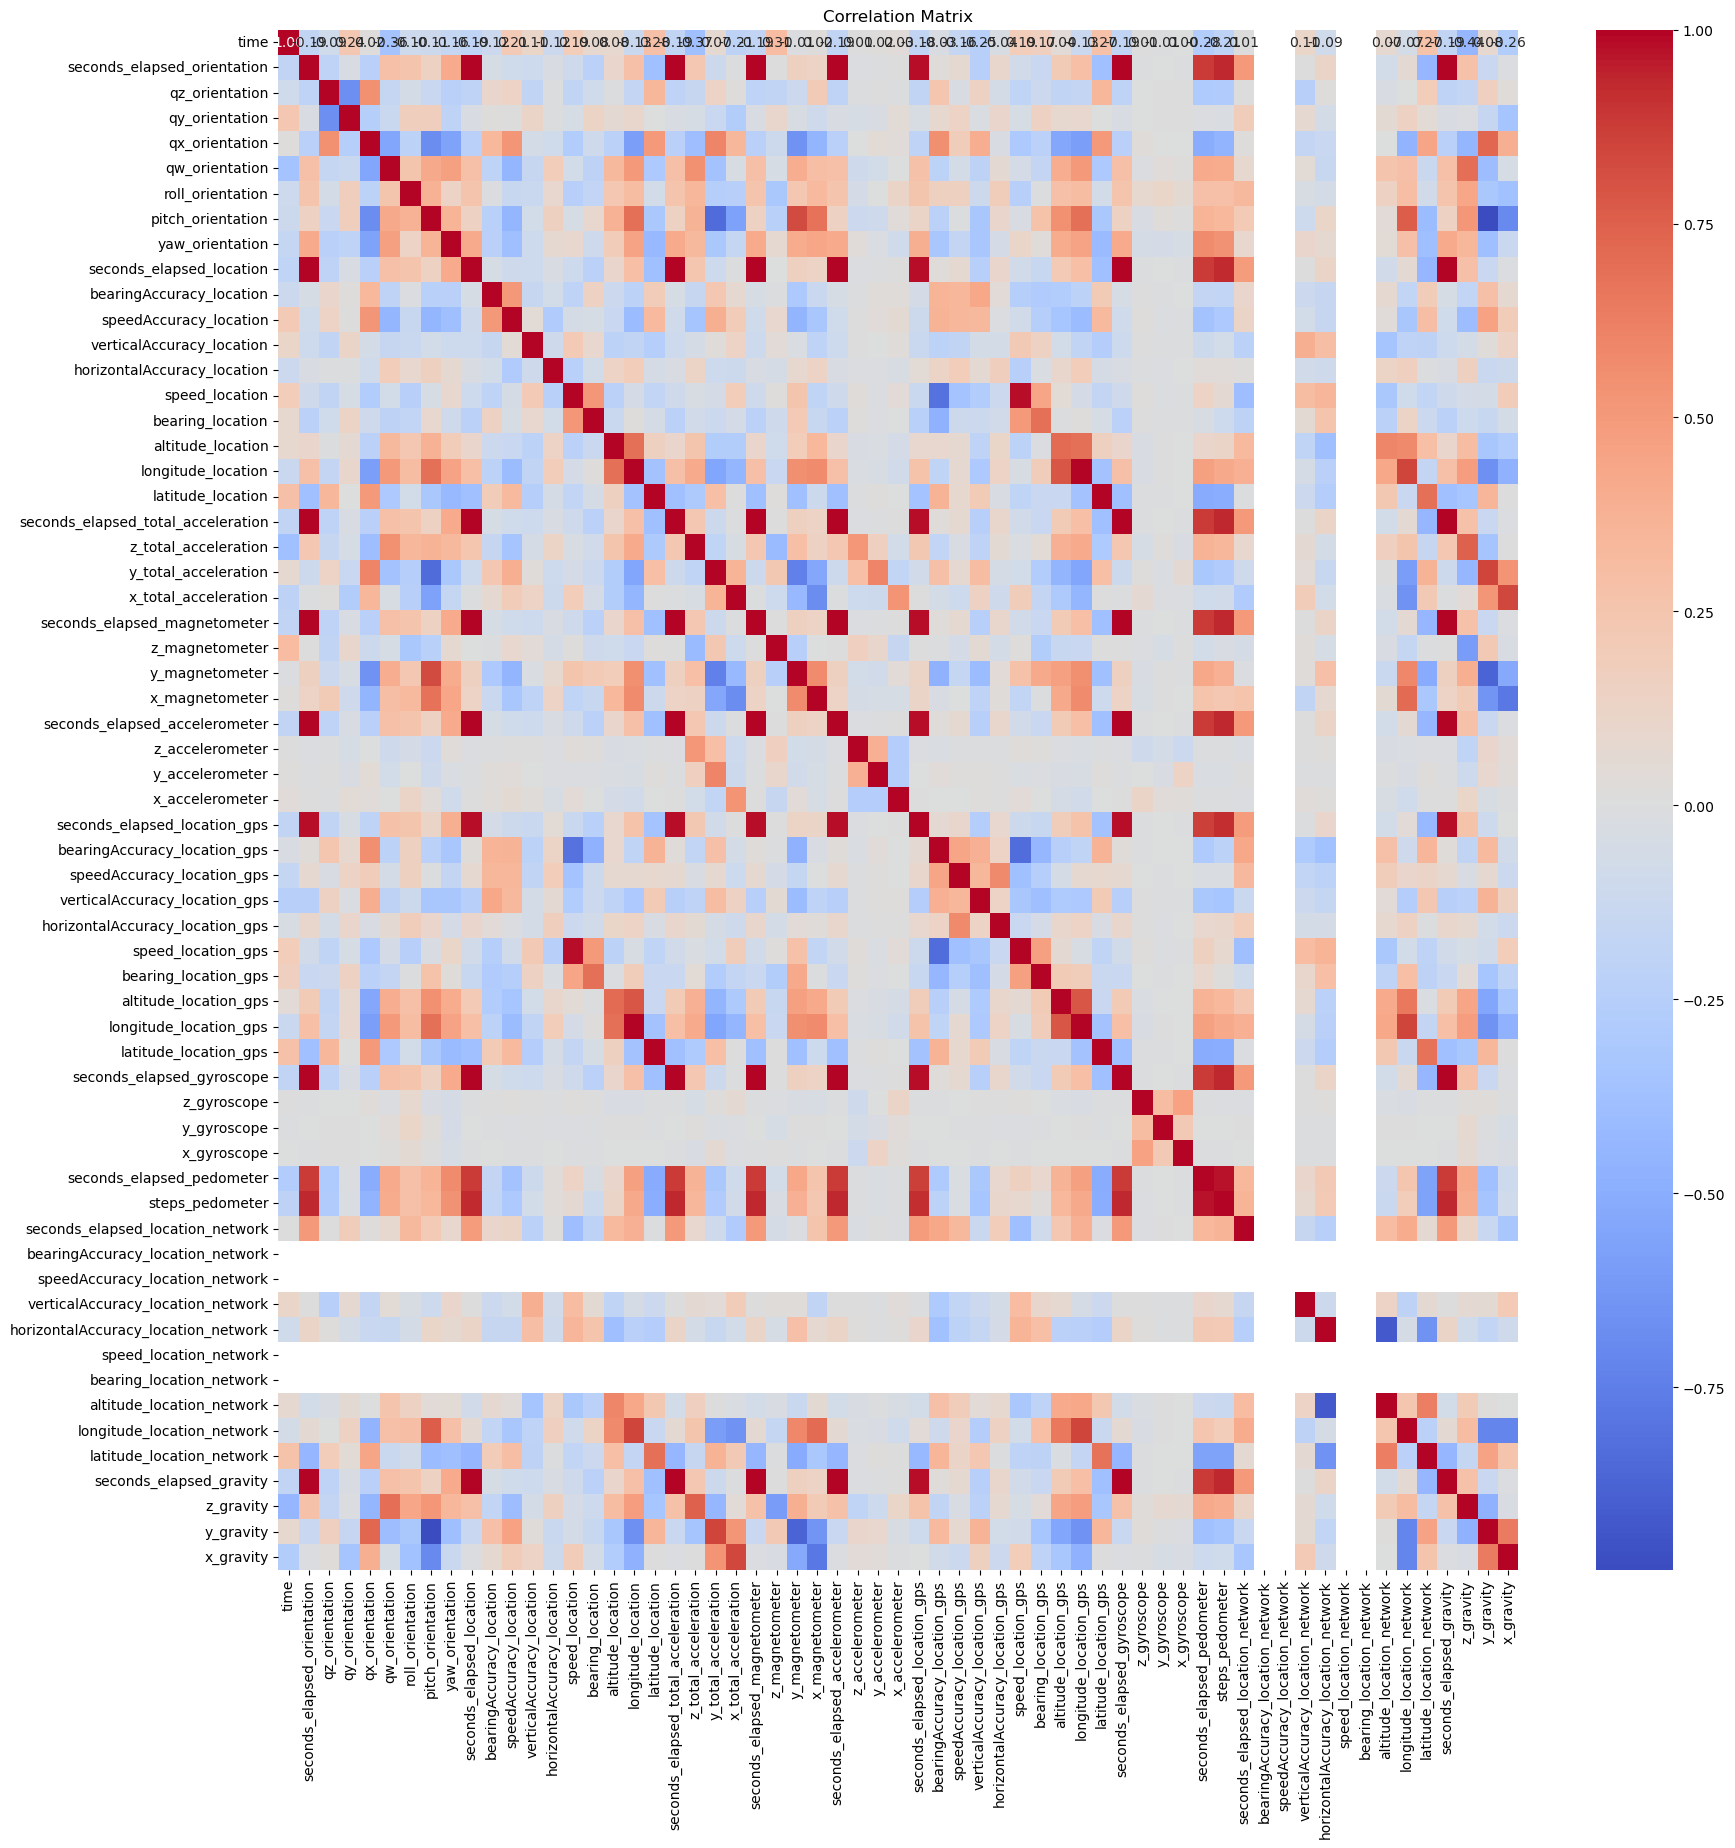

In [31]:
#correlation matrix
correlation=X_train.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Timeseries

In [32]:
time_to_date= pd.to_datetime(X_train['time'], unit='ns')
time_to_date.describe()

count                          2205096
mean     2023-09-21 06:39:49.968205824
min      2023-09-14 06:22:23.371911400
25%      2023-09-14 09:16:30.864867840
50%      2023-09-16 09:28:51.265292800
75%      2023-09-16 18:25:46.567019264
max      2023-10-18 09:15:27.097844200
Name: time, dtype: object

In [33]:
decomposed_data = {}

for column in X_train.columns:
    decomposition = seasonal_decompose(X_train[column], model='additive', period=1)
    decomposed_data[column] = decomposition

In [19]:
'''for column in decomposed_data.keys():
    plt.figure(figsize=(12, 10))

    plt.subplot(4, 1, 1)
    decomposed_data[column].trend.plot()
    plt.title(f'Trend Component - {column}')
    plt.xlabel('Time')
    plt.ylabel('Trend Component')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 10))
    plt.subplot(4, 1, 2)
    decomposed_data[column].observed.plot()
    plt.title(f'Observed Data - {column}')
    plt.xlabel('Time')
    plt.ylabel('Observed Data')
    plt.tight_layout()
    plt.show()'''


"for column in decomposed_data.keys():\n    plt.figure(figsize=(12, 10))\n\n    plt.subplot(4, 1, 1)\n    decomposed_data[column].trend.plot()\n    plt.title(f'Trend Component - {column}')\n    plt.xlabel('Time')\n    plt.ylabel('Trend Component')\n    plt.tight_layout()\n    plt.show()\n\n    plt.figure(figsize=(12, 10))\n    plt.subplot(4, 1, 2)\n    decomposed_data[column].observed.plot()\n    plt.title(f'Observed Data - {column}')\n    plt.xlabel('Time')\n    plt.ylabel('Observed Data')\n    plt.tight_layout()\n    plt.show()"

In [ ]:
plt.figure(figsize=(20, 40))
for column in X_train.columns:
    plt.subplot(11, 6, i)
    plt.figure(figsize=(12, 6))
    plt.plot(X_train.index, X_train[column])
    plt.title(f'{column} over Time')
    plt.xlabel('Time')
    plt.ylabel(column)
    plt.grid(True)
    plt.show()

## Geovisualization

In [34]:

m = folium.Map(location=[X_train['latitude_location'].mean(), X_train['longitude_location'].mean()], zoom_start=10) 

northmost_point = X_train.loc[X_train['latitude_location'].idxmax(), ['latitude_location', 'longitude_location']]
southmost_point = X_train.loc[X_train['latitude_location'].idxmin(), ['latitude_location', 'longitude_location']]
eastmost_point = X_train.loc[X_train['longitude_location'].idxmax(), ['latitude_location', 'longitude_location']]
westmost_point = X_train.loc[X_train['longitude_location'].idxmin(), ['latitude_location', 'longitude_location']]

#50 random data points
for _ in range(50):
    random_record = X_train.sample()
    longitude = random_record['longitude_location'].values[0]
    latitude = random_record['latitude_location'].values[0]

    folium.Marker([latitude, longitude], tooltip='Random Location').add_to(m)

folium.Marker([northmost_point['latitude_location'], northmost_point['longitude_location']], tooltip='Northmost Point', icon=folium.Icon(color='red')).add_to(m)
folium.Marker([southmost_point['latitude_location'], southmost_point['longitude_location']], tooltip='Southmost Point', icon=folium.Icon(color='red')).add_to(m)
folium.Marker([eastmost_point['latitude_location'], eastmost_point['longitude_location']], tooltip='Eastmost Point', icon=folium.Icon(color='red')).add_to(m)
folium.Marker([westmost_point['latitude_location'], westmost_point['longitude_location']], tooltip='Westmost Point', icon=folium.Icon(color='red')).add_to(m)

m.save("map.html")
m


## PCA

In [35]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_train)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
print(pca_df.sample(5))

                  PC1          PC2
1119045 -4.215138e+14   451.623330
890975  -4.212199e+14  1494.943157
1395163 -5.499652e+14 -1111.787750
973455  -4.279057e+14  -402.317911
1578089 -5.973865e+14  -712.981964


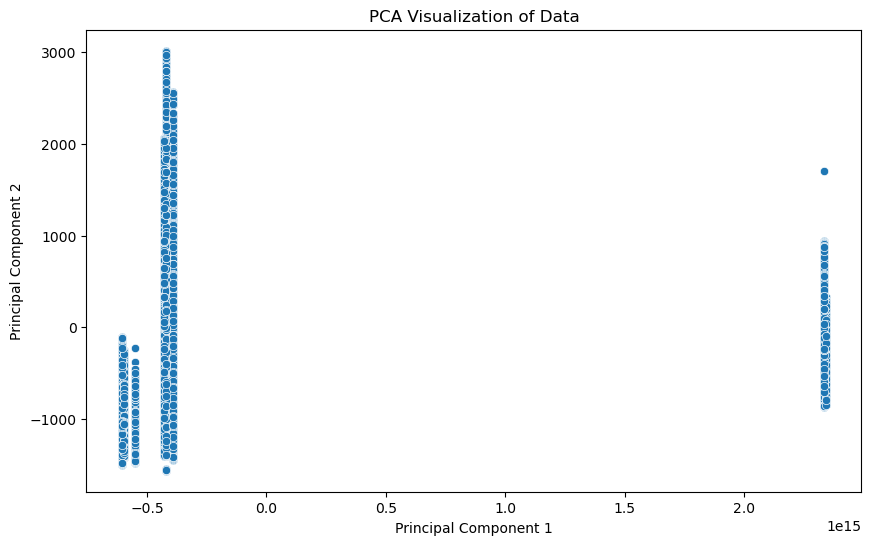

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.title('PCA Visualization of Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [37]:
print(pca.explained_variance_ratio_)

[1.00000000e+00 1.10414629e-24]


### Possible Reasons for Such Result in PCA:

### High Variable Correlation:
If variables are highly correlated, PCA may "capture" most of the variance in one component.

### Lack of Data Diversity:
If data lacks diversity or has low variability, PCA may struggle to detect significant differences between samples.

Given the nature of the data being measurements from several sensors, they are likely to be similar, with values close to each other. Additionally, some variables are highly correlated due to repetitive input data.

After analyzing correlations and dependencies between variables and conducting column reduction, PCA will be performed again.

In [38]:
pca = PCA(n_components=X_train.shape[1])
pca.fit(X_train)

cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
optimal_num_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1

print(f"Optimal number of components to explain 95% variance: {optimal_num_components}")
print("Explained variance ratio for first few components:")
for i in range(5):
    print(f"PC{i+1}: {pca.explained_variance_ratio_[i]}")

Optimal number of components to explain 95% variance: 1
Explained variance ratio for first few components:
PC1: 1.0
PC2: 1.104146290096064e-24
PC3: 1.0303909742196245e-25
PC4: 4.356022942755446e-26
PC5: 3.0116020952920106e-26
